<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_ParkTransformationTwoVariations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector: Two Variations of Park Transformation</h1></b>

Dr. Bingsen Wang

7/26/2024
</center>

#Park Transformation

From $\alpha\beta$ to $dq$
$$
\underline v_{qd} = \underline v_{\alpha\beta}e^{-j\theta}
\tag{1}$$

where $\theta$ is the angle between $\alpha$- and $d$-axes or between the $\alpha$- and $q$-axes.

##Variation #1: Angle $\theta$ is between $\alpha$- and $d$-axes

From (1), the tranformation becomes
$$\underline v_{qd} = v_d+ jv_q = (v_\alpha + jv_\beta)(\cos\theta - j\sin\theta)\tag{2}$$

In sclar form, (2) can be written in two equations.
$$\begin{align}
v_d &=  v_\alpha \cos\theta + v_\beta \sin\theta\\
v_q &= -v_\alpha \sin\theta + v_\beta \cos\theta
\end{align}\tag{3}$$

Alternatively, (2) can be written in matrix form.
$$\begin{bmatrix}v_d \\v_q \end{bmatrix} =
\begin{bmatrix}  \cos\theta & \sin\theta\\
                -\sin\theta & \cos\theta\end{bmatrix}
\begin{bmatrix}v_\alpha \\v_\beta \end{bmatrix}
\tag{4}$$


##Variation #2: Angle $\theta$ is between $\alpha$- and $q$-axes

From (1), the tranformation becomes
$$\underline v_{qd} = v_q - jv_d = (v_\alpha + jv_\beta)(\cos\theta - j\sin\theta)\tag{5}$$

In sclar form, (5) can be written in two equations.
$$\begin{align}
v_q &=  v_\alpha \cos\theta + v_\beta \sin\theta\\
v_d &= v_\alpha \sin\theta - v_\beta \cos\theta
\end{align}\tag{6}$$

Alternatively, (5) can be written in matrix form.
$$\begin{bmatrix}v_q \\v_d \end{bmatrix} =
\begin{bmatrix}  \cos\theta &  \sin\theta\\
                 \sin\theta & -\cos\theta\end{bmatrix}
\begin{bmatrix}v_\alpha \\v_\beta \end{bmatrix}
\tag{7}$$


#Python Code
The Python code illustrates the two variations of the Park transformations.

0
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
0


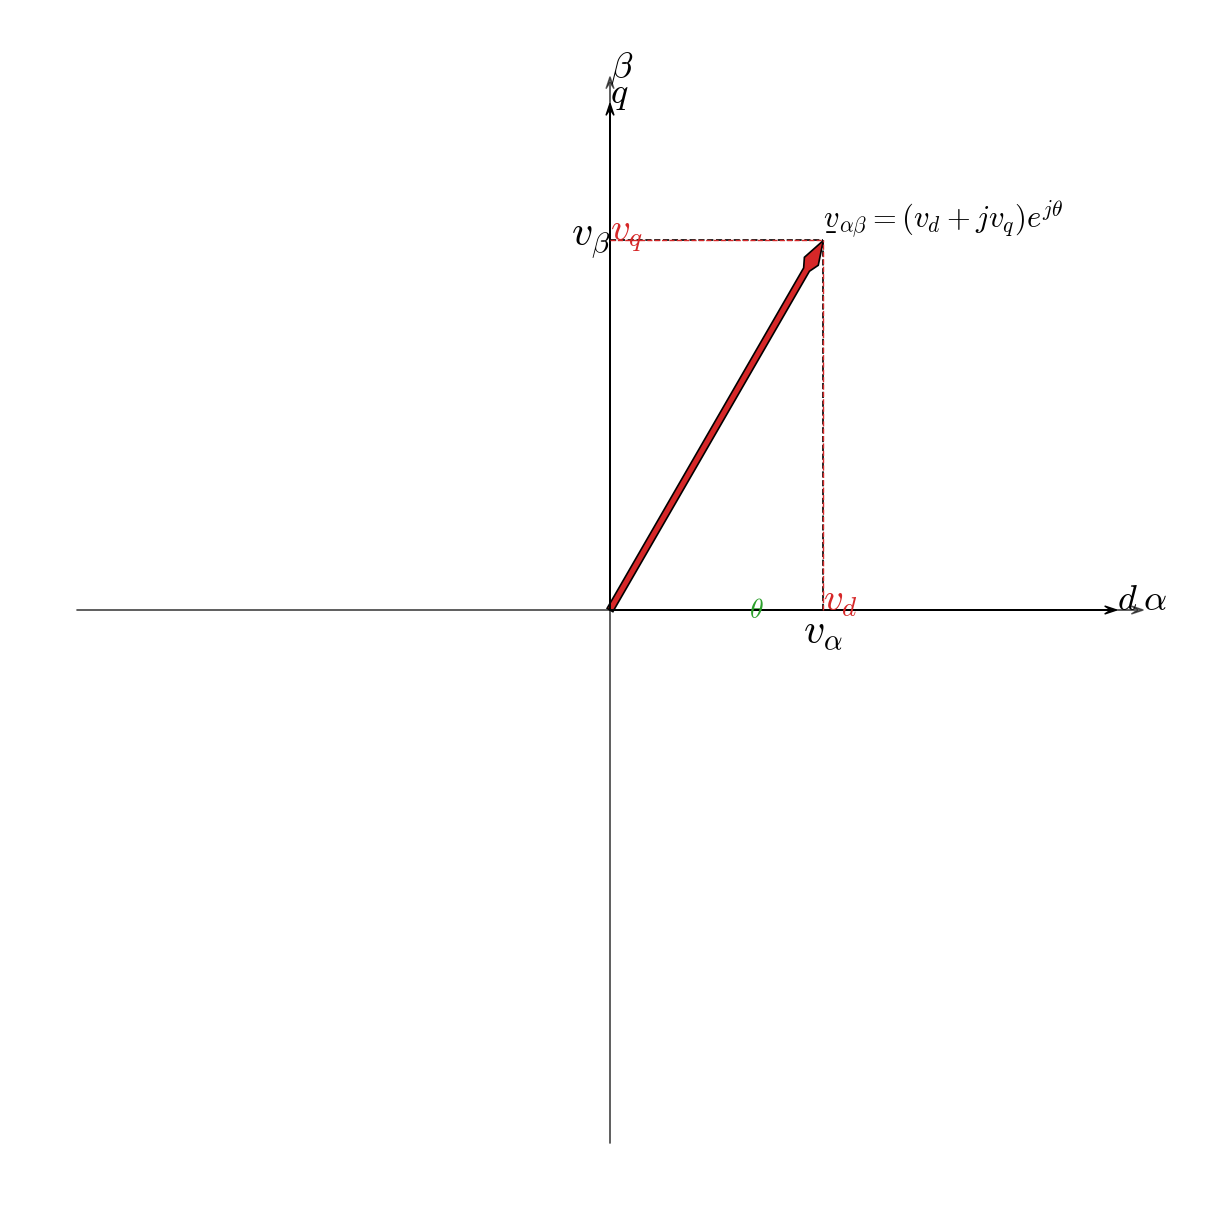

In [1]:
from operator import eq
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,array
from numpy import heaviside as h
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.patches import FancyArrow as fa
from matplotlib import animation,rc,transforms
# rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def ab2dq(xab,theta): #Park transformation, alpha-beta to dq
  return xab*exp(-1j*theta)

#parameters
Nfps = 450
V,fe,phi = 3.2,1,pi/3 #voltage amplitude,frequency,phase
t=linspace(0,1/fe,Nfps)
wt = 2*pi*fe*t #angular frequency
vab = V*exp(1j*(wt+phi)) #space vector in alpha-beta
vqd = ab2dq(vab,wt) #space vector in dq

#plotting
xymax,xylim = 4,[-4.5,4.5]
clst=['tab:red','tab:blue','tab:brown','tab:purple','tab:green',
      'tab:olive','tab:orange','k','w'] #colors light bg
tns = [r'$\alpha$',r'$\beta$','$d$','$q$',
       r'$v_\alpha$',r'$v_\beta$','$v_d$','$v_q$','$v_q$','-$v_d$'] #labels
aligns = ['left','right','bottom','top']
fig = plt.figure(figsize=(12,12))
axs,lines,txts = [],[],[]
as1 = {'head_width':.06,'length_includes_head':True,'overhang':.5} #arr style
as2 = {'width':.05,'head_width':.12,'length_includes_head':True,'overhang':-.4} #arr style
for k in range(2):
  axs.append(fig.add_axes((0,0,1,1),xlim=xylim,ylim=xylim,fc='none'))
  axs[-1].set_axis_off()
  rot=transforms.Affine2D().rotate_around(0,0,pi/2*k)+axs[0].transData
  axs[0].add_patch(fa(-xymax,0,2*xymax,0,**as1,transform=rot,color=clst[-2],alpha=.6))#ab ax
  axs[0].text(xymax,0,tns[k],transform=rot,size=26) #ax labels
lines.append(axs[0].plot([],[],'-',lw=3,color=clst[3])[0]) #v_alpha, v_beta

def drawQD(ax,xymax,vqd,theta,thetaReference): # dq
  rot=transforms.Affine2D().rotate_around(0,0,theta)+ax.transData
  if thetaReference==0:
    for k in range(2):
      rot1=transforms.Affine2D().rotate_around(0,0,theta+k*pi/2)+ax.transData
      ax.add_patch(fa(0,0,xymax*.95,0, **as1,transform=rot1,color=clst[-2])) #dq ax
      ax.plot([vqd.real*(1-k),vqd.real],[vqd.imag*k,vqd.imag],'--',transform=rot,lw=1,color=clst[0])
      ax.text(vqd.real*(1-k),vqd.imag*k,tns[6+k],transform=rot,size=28,color=clst[0]) #vd,vq
      ax.text(.95*xymax,0,tns[2+k],transform=rot1,size=26,color=clst[-2])
  else:
    for k in range(2):
      rot1=transforms.Affine2D().rotate_around(0,0,theta+(k-1)*pi/2)+ax.transData
      ax.add_patch(fa(-.55*(1-k)*xymax,0,(.95+.55*(1-k))*xymax,0, **as1,transform=rot1,color=clst[-2])) #dq ax
      ax.plot([vqd.real*(1-k),vqd.real],[vqd.imag*k,vqd.imag],'--',transform=rot,lw=1,color=clst[0])
      ax.text(vqd.real*(1-k),vqd.imag*k,tns[8+k],transform=rot,size=28,color=clst[0]) #vd,vq
      ax.text(.95*xymax,0,tns[2+k],transform=rot1,size=26,color=clst[-2])
  return
def drawVectors_srf(ax,xymax,xylim,vab,vqd,theta,N,clst): # in stationary reference frame
  ax.clear()
  ax.set_xlim(xylim)
  ax.set_ylim(xylim)
  ax.set_axis_off()
  ax.add_patch(fa(0,0,vab.real, vab.imag, **as2,fc=clst[0],ec=clst[-2],lw=1.2)) #sv_ab
  if N==0:
    ax.text(vab.real,vab.imag,r'$v\underbar_{\alpha\beta} = (v_d+jv_q)e^{j\theta}$',size = 22,color=clst[-2],
            va=aligns[int(h(-vab.imag,0))+2],ha=aligns[int(h(-vab.real,0))]) #
  else:
    ax.text(vab.real,vab.imag,r'$v\underbar_{\alpha\beta} = (v_q-jv_d)e^{j\theta}$',size = 22,color=clst[-2],
            va=aligns[int(h(-vab.imag,0))+2],ha=aligns[int(h(-vab.real,0))]) #

  ax.text(vab.real,0,r'$v_\alpha$',size = 30,ha='center',va=aligns[int(h(vab.imag,0))+2],color=clst[-2]) #v_alpha
  ax.text(0,vab.imag,r'$v_\beta$',size = 30,va='center',ha=aligns[int(h(vab.real,0))],color=clst[-2]) #v_beta
  ax.plot([vab.real,vab.real],[0,vab.imag],'--',lw=1.2,color=clst[-2])
  ax.plot([0,vab.real],[vab.imag,vab.imag],'--',lw=1.2,color=clst[-2])
  drawQD(ax,xymax,vqd,theta,N)

  ax.add_patch(mp.Arc((0,0),2,2,theta2=theta*180/pi,color=clst[4],lw=1.5,alpha=.8))
  rot=transforms.Affine2D().rotate_around(0,0,theta*.5)+ax.transData
  ax.text(1.1,0,r'$\theta$',size=20,va='center',ha='center',transform=rot,color=clst[4])#,backgroundcolor=clst[-1])
  return

# animation function. This is called sequentially
def animate(i):
  # i=60
  if i%30==0: print(i) #for monitoring the progress
  ii=int(i/Nfps)
  i=i%Nfps
  lines[0].set_data(vab[:i+1].real,vab[:i+1].imag)
  drawVectors_srf(axs[1],xymax,xylim,vab[i],vqd[i],wt[i],ii,clst)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps*2, interval=50)
fn = r"SpaceVector_ParkTransformationTwoVariations.mp4"
writervideo = animation.FFMpegWriter(fps=30)
anim.save(fn, writer=writervideo,dpi = 200)